In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/raw/Base.csv')

df['fraud_bool'] = df['fraud_bool'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['employment_status'] = df['employment_status'].astype('category')
df['email_is_free'] = df['email_is_free'].astype('category')
df['housing_status'] = df['housing_status'].astype('category')
df['phone_home_valid'] = df['phone_home_valid'].astype('category')
df['phone_mobile_valid'] = df['phone_mobile_valid'].astype('category')
df['has_other_cards'] = df['has_other_cards'].astype('category')
df['foreign_request'] = df['foreign_request'].astype('category')
df['source'] = df['source'].astype('category')
df['device_os'] = df['device_os'].astype('category')

fin_df = df[['fraud_bool','income','credit_risk_score','proposed_credit_limit']]
print(fin_df)

       fraud_bool  income  credit_risk_score  proposed_credit_limit
0               0     0.3                163                 1500.0
1               0     0.8                154                 1500.0
2               0     0.8                 89                  200.0
3               0     0.6                 90                  200.0
4               0     0.9                 91                  200.0
...           ...     ...                ...                    ...
999995          0     0.8                305                 1500.0
999996          0     0.9                235                 1000.0
999997          0     0.8                195                  200.0
999998          0     0.9                148                  200.0
999999          0     0.6                100                  200.0

[1000000 rows x 4 columns]


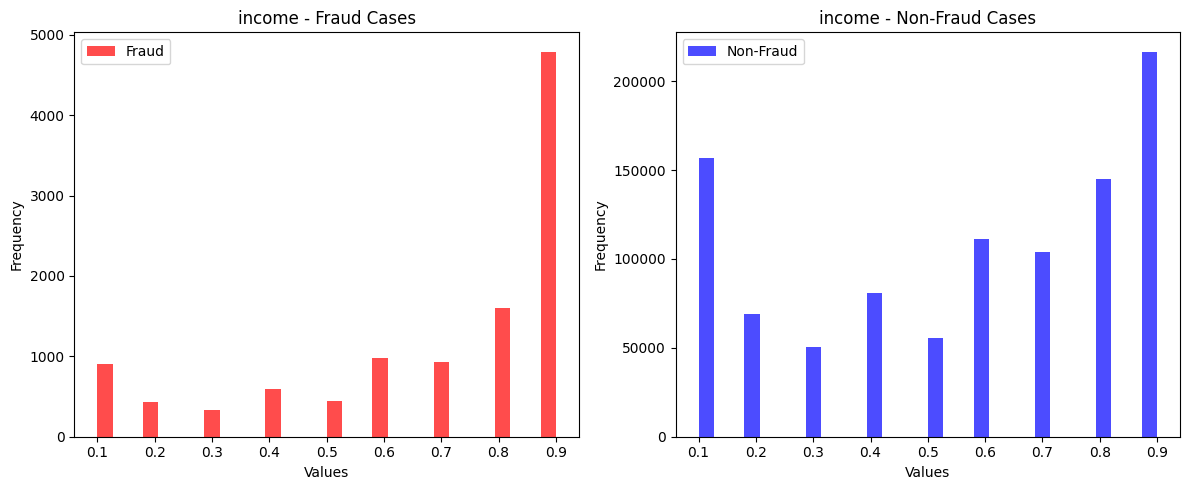

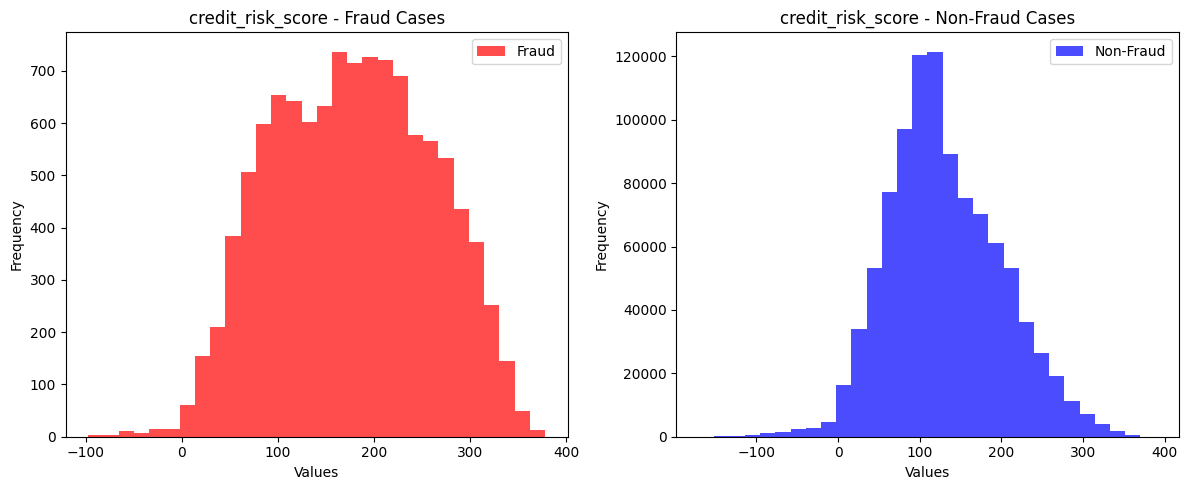

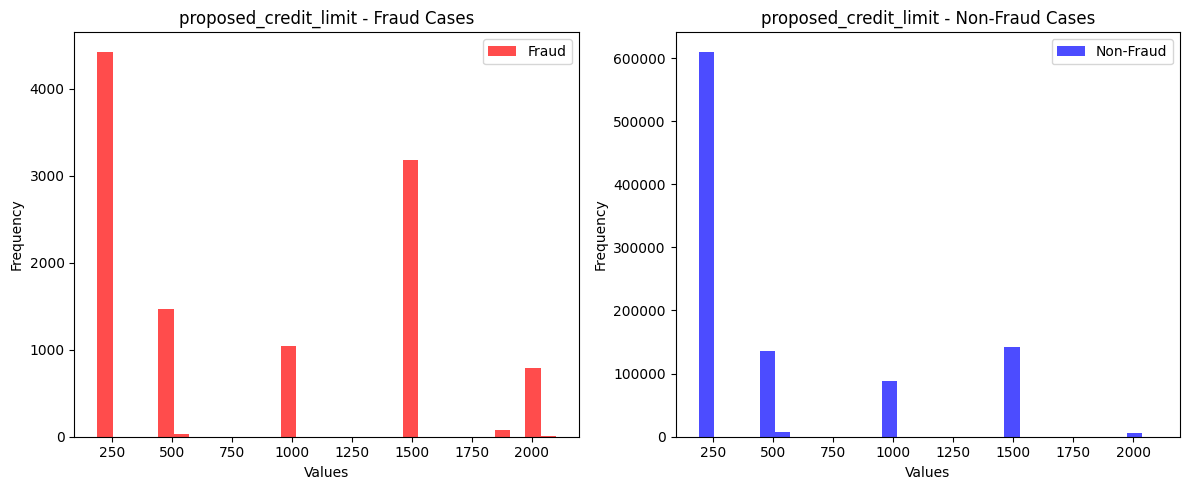

In [3]:
import matplotlib.pyplot as plt

# Extract necessary columns
selected_cols = ['income', 'credit_risk_score', 'proposed_credit_limit']
selected_df = df[selected_cols + ['fraud_bool']]

# Split the data into fraud and non-fraud
fraud_data = selected_df[selected_df['fraud_bool'] == 1]
non_fraud_data = selected_df[selected_df['fraud_bool'] == 0]

# Plot histograms for each variable separately for fraud and non-fraud
for column in selected_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    
    # Plot for fraud cases
    axes[0].hist(fraud_data[column], bins=30, alpha=0.7, color='red', label='Fraud')
    axes[0].set_title(f'{column} - Fraud Cases')
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    
    # Plot for non-fraud cases
    axes[1].hist(non_fraud_data[column], bins=30, alpha=0.7, color='blue', label='Non-Fraud')
    axes[1].set_title(f'{column} - Non-Fraud Cases')
    axes[1].set_xlabel('Values')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()


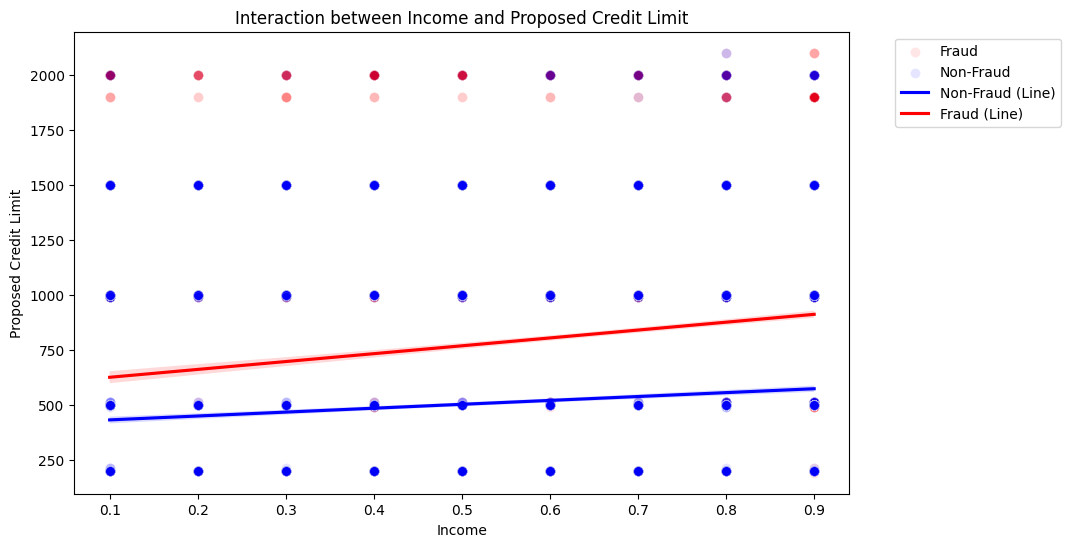

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Undersample the non-fraud data to make it the same size as the fraud data
undersampled_non_fraud_data = non_fraud_data.sample(n=len(fraud_data), random_state=42)

# Plot the scatter plot for fraud data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='proposed_credit_limit', data=fraud_data, color='red', label='Fraud', s=50,alpha = 0.1)

# Plot the scatter plot for undersampled non-fraud data on the same axes
sns.scatterplot(x='income', y='proposed_credit_limit', data=undersampled_non_fraud_data, color='blue', label='Non-Fraud', s=50,alpha = 0.1)

# Plot a line representing the relationship between 'income' and 'proposed_credit_limit' for the undersampled non-fraud data
sns.regplot(x='income', y='proposed_credit_limit', data=undersampled_non_fraud_data, scatter=False, color='blue', label='Non-Fraud (Line)')
sns.regplot(x='income', y='proposed_credit_limit', data=fraud_data, scatter=False, color='red', label='Fraud (Line)')
plt.title('Interaction between Income and Proposed Credit Limit')
plt.xlabel('Income')
plt.ylabel('Proposed Credit Limit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the position of the legend
plt.show()



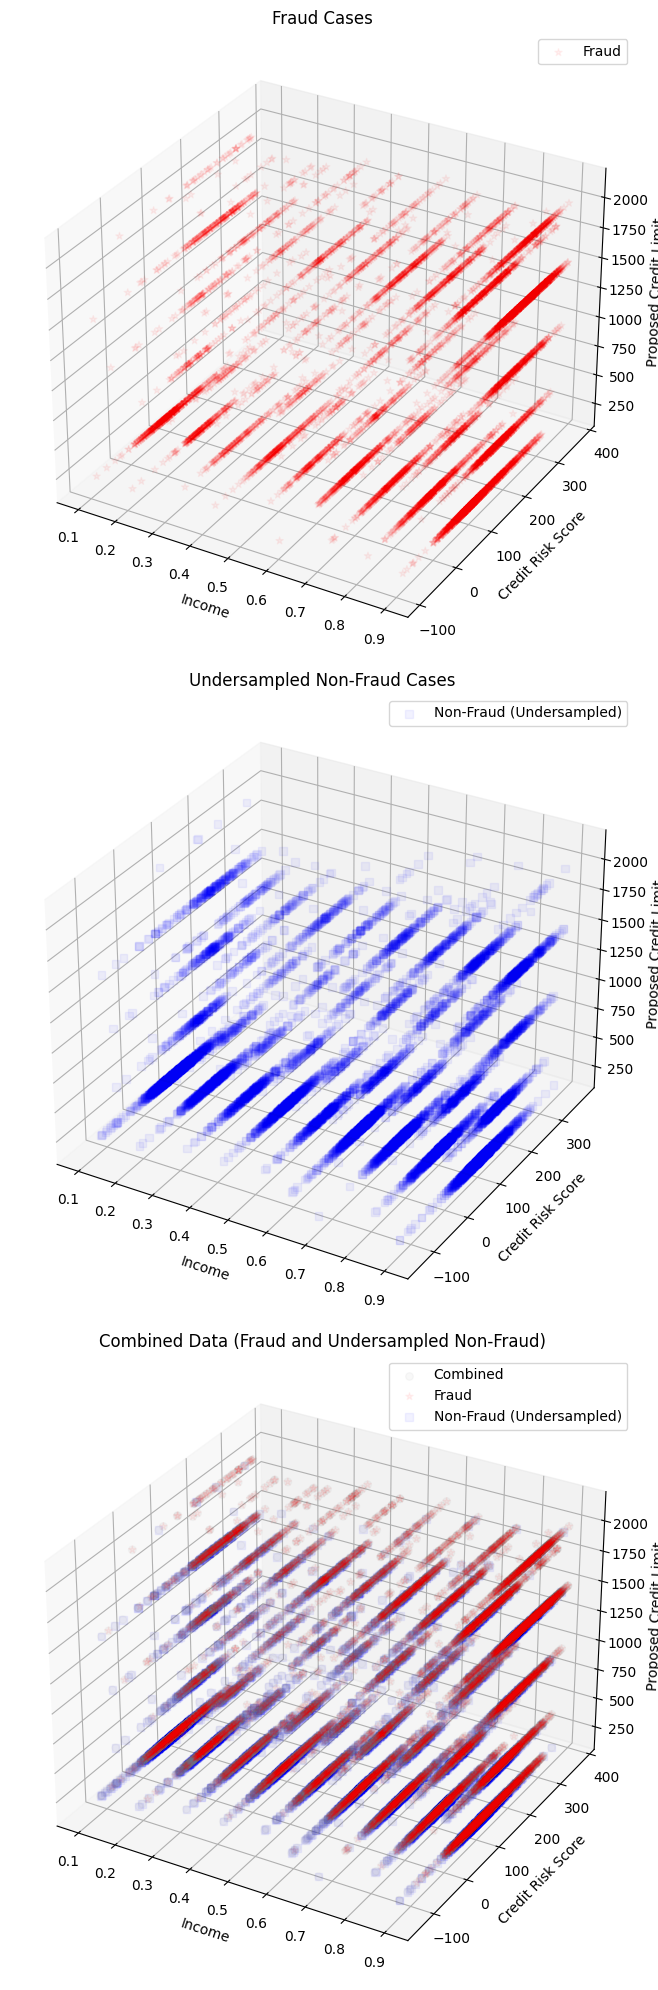

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for the plots
fig, axes = plt.subplots(3, 1, figsize=(10,20), subplot_kw={'projection': '3d'})

# Plot for fraud cases
axes[0].scatter(fraud_data['income'], fraud_data['credit_risk_score'], fraud_data['proposed_credit_limit'], marker='*', c='red', label='Fraud', s=30, alpha=0.05)
axes[0].set_title('Fraud Cases')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Credit Risk Score')
axes[0].set_zlabel('Proposed Credit Limit')
axes[0].legend()

# Plot for undersampled non-fraud cases
axes[1].scatter(undersampled_non_fraud_data['income'], undersampled_non_fraud_data['credit_risk_score'], undersampled_non_fraud_data['proposed_credit_limit'], marker='s', c='blue', label='Non-Fraud (Undersampled)', s=30, alpha=0.05)
axes[1].set_title('Undersampled Non-Fraud Cases')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Credit Risk Score')
axes[1].set_zlabel('Proposed Credit Limit')
axes[1].legend()

# Plot for combined data
combined_data = pd.concat([fraud_data, undersampled_non_fraud_data])
axes[2].scatter(combined_data['income'], combined_data['credit_risk_score'], combined_data['proposed_credit_limit'], c='gray', label='Combined', s=30, alpha=0.05)
axes[2].scatter(fraud_data['income'], fraud_data['credit_risk_score'], fraud_data['proposed_credit_limit'], marker='*', c='red', label='Fraud', s=30, alpha=0.05)
axes[2].scatter(undersampled_non_fraud_data['income'], undersampled_non_fraud_data['credit_risk_score'], undersampled_non_fraud_data['proposed_credit_limit'], marker='s', c='blue', label='Non-Fraud (Undersampled)', s=30, alpha=0.05)
axes[2].set_title('Combined Data (Fraud and Undersampled Non-Fraud)')
axes[2].set_xlabel('Income')
axes[2].set_ylabel('Credit Risk Score')
axes[2].set_zlabel('Proposed Credit Limit')
axes[2].legend()

plt.tight_layout()
plt.show()


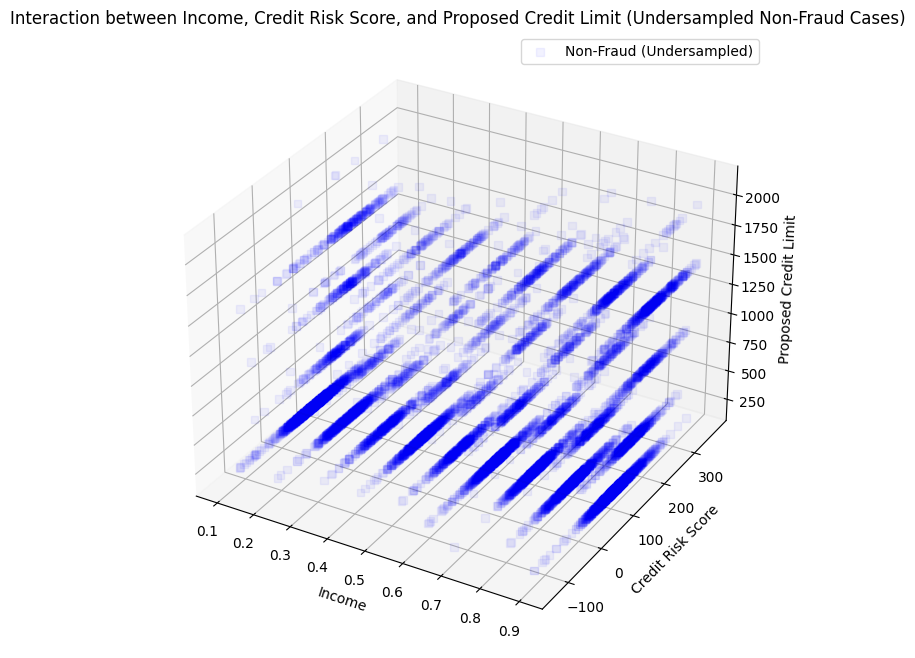

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for undersampled non-fraud cases
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot undersampled non-fraud data
ax.scatter(undersampled_non_fraud_data['income'], undersampled_non_fraud_data['credit_risk_score'], undersampled_non_fraud_data['proposed_credit_limit'], marker='s', c='blue', label='Non-Fraud (Undersampled)', s=30, alpha=0.05)

ax.set_title('Interaction between Income, Credit Risk Score, and Proposed Credit Limit (Undersampled Non-Fraud Cases)')
ax.set_xlabel('Income')
ax.set_ylabel('Credit Risk Score')
ax.set_zlabel('Proposed Credit Limit')
ax.legend()

plt.show()



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Undersample the non-fraud data to match the size of the fraud data
undersampled_non_fraud_data = non_fraud_data.sample(n=len(fraud_data), random_state=42)

# Combine the undersampled non-fraud data with the fraud data
combined_data = pd.concat([fraud_data, undersampled_non_fraud_data])

# Split the combined data into features (X) and target labels (y)
X = combined_data[['income', 'credit_risk_score', 'proposed_credit_limit']]
y = combined_data['fraud_bool']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier on the undersampled non-fraud data
dt_classifier_non_fraud = DecisionTreeClassifier(random_state=42)
dt_classifier_non_fraud.fit(X_train, y_train)

# Train a Decision Tree classifier on the fraud data
dt_classifier_fraud = DecisionTreeClassifier(random_state=42)
dt_classifier_fraud.fit(X_train, y_train)

# Make predictions on the testing set for both models
y_pred_non_fraud = dt_classifier_non_fraud.predict(X_test)
y_pred_fraud = dt_classifier_fraud.predict(X_test)

# Evaluate the performance of the models
print("Decision Tree Classifier on Income Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_non_fraud))
print("Classification Report:")
print(classification_report(y_test, y_pred_non_fraud))

Decision Tree Classifier on Income Data:
Accuracy: 0.6049410698096102
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.69      0.63      2180
           1       0.63      0.52      0.57      2232

    accuracy                           0.60      4412
   macro avg       0.61      0.61      0.60      4412
weighted avg       0.61      0.60      0.60      4412



The following 3 plots are Decision Trees.

DT on income data only (credit_risk_score,income,proposed_credit_limit). Data is undersampled to have a 1:1 ratio of fraud data against non fraud data
DT on entire dataset. Data is not undersampled
DT on entire dataset. Data is undersampled to have a 1:1 ratio of fraud data against non fraud data

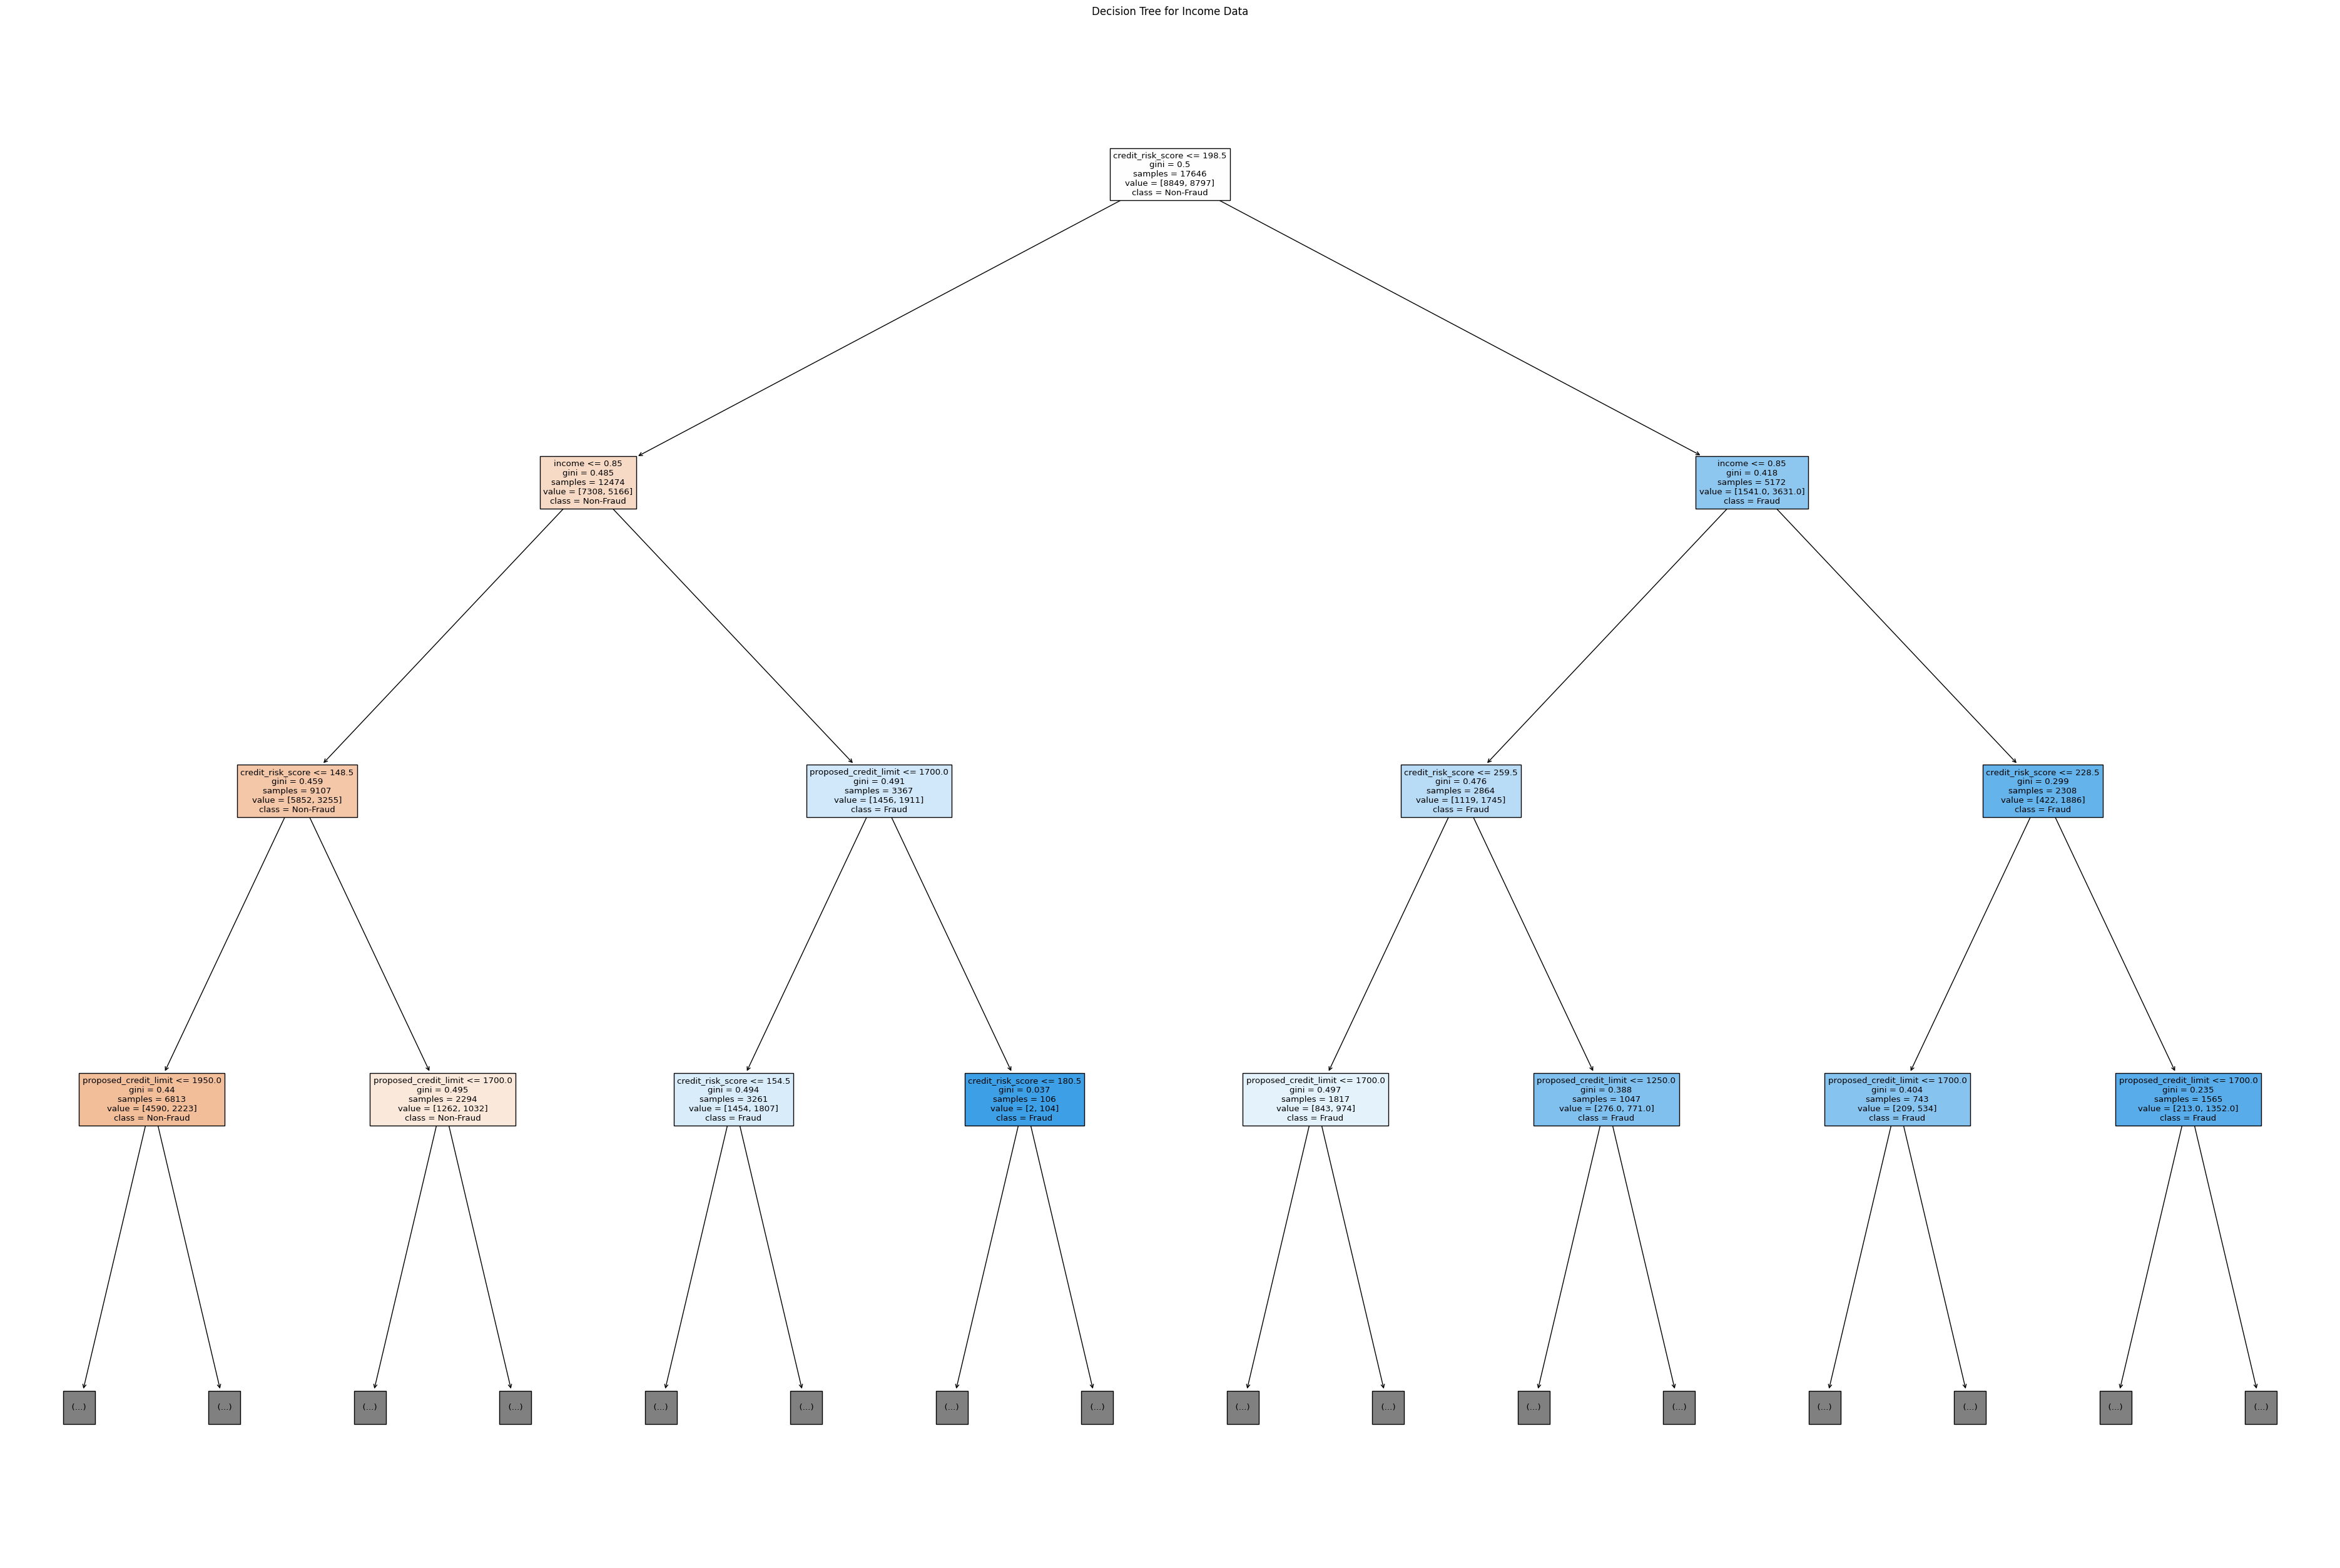

In [8]:
from sklearn.tree import plot_tree

# Plot Decision Tree
plt.figure(figsize=(48, 32))
plot_tree(dt_classifier_non_fraud, max_depth=3, feature_names=X.columns, class_names=['Non-Fraud', 'Fraud'], filled=True)
plt.title("Decision Tree for Income Data")
plt.show()


Decision Tree Classifier:
Accuracy: 0.977835
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    197891
           1       0.08      0.11      0.10      2109

    accuracy                           0.98    200000
   macro avg       0.54      0.55      0.54    200000
weighted avg       0.98      0.98      0.98    200000



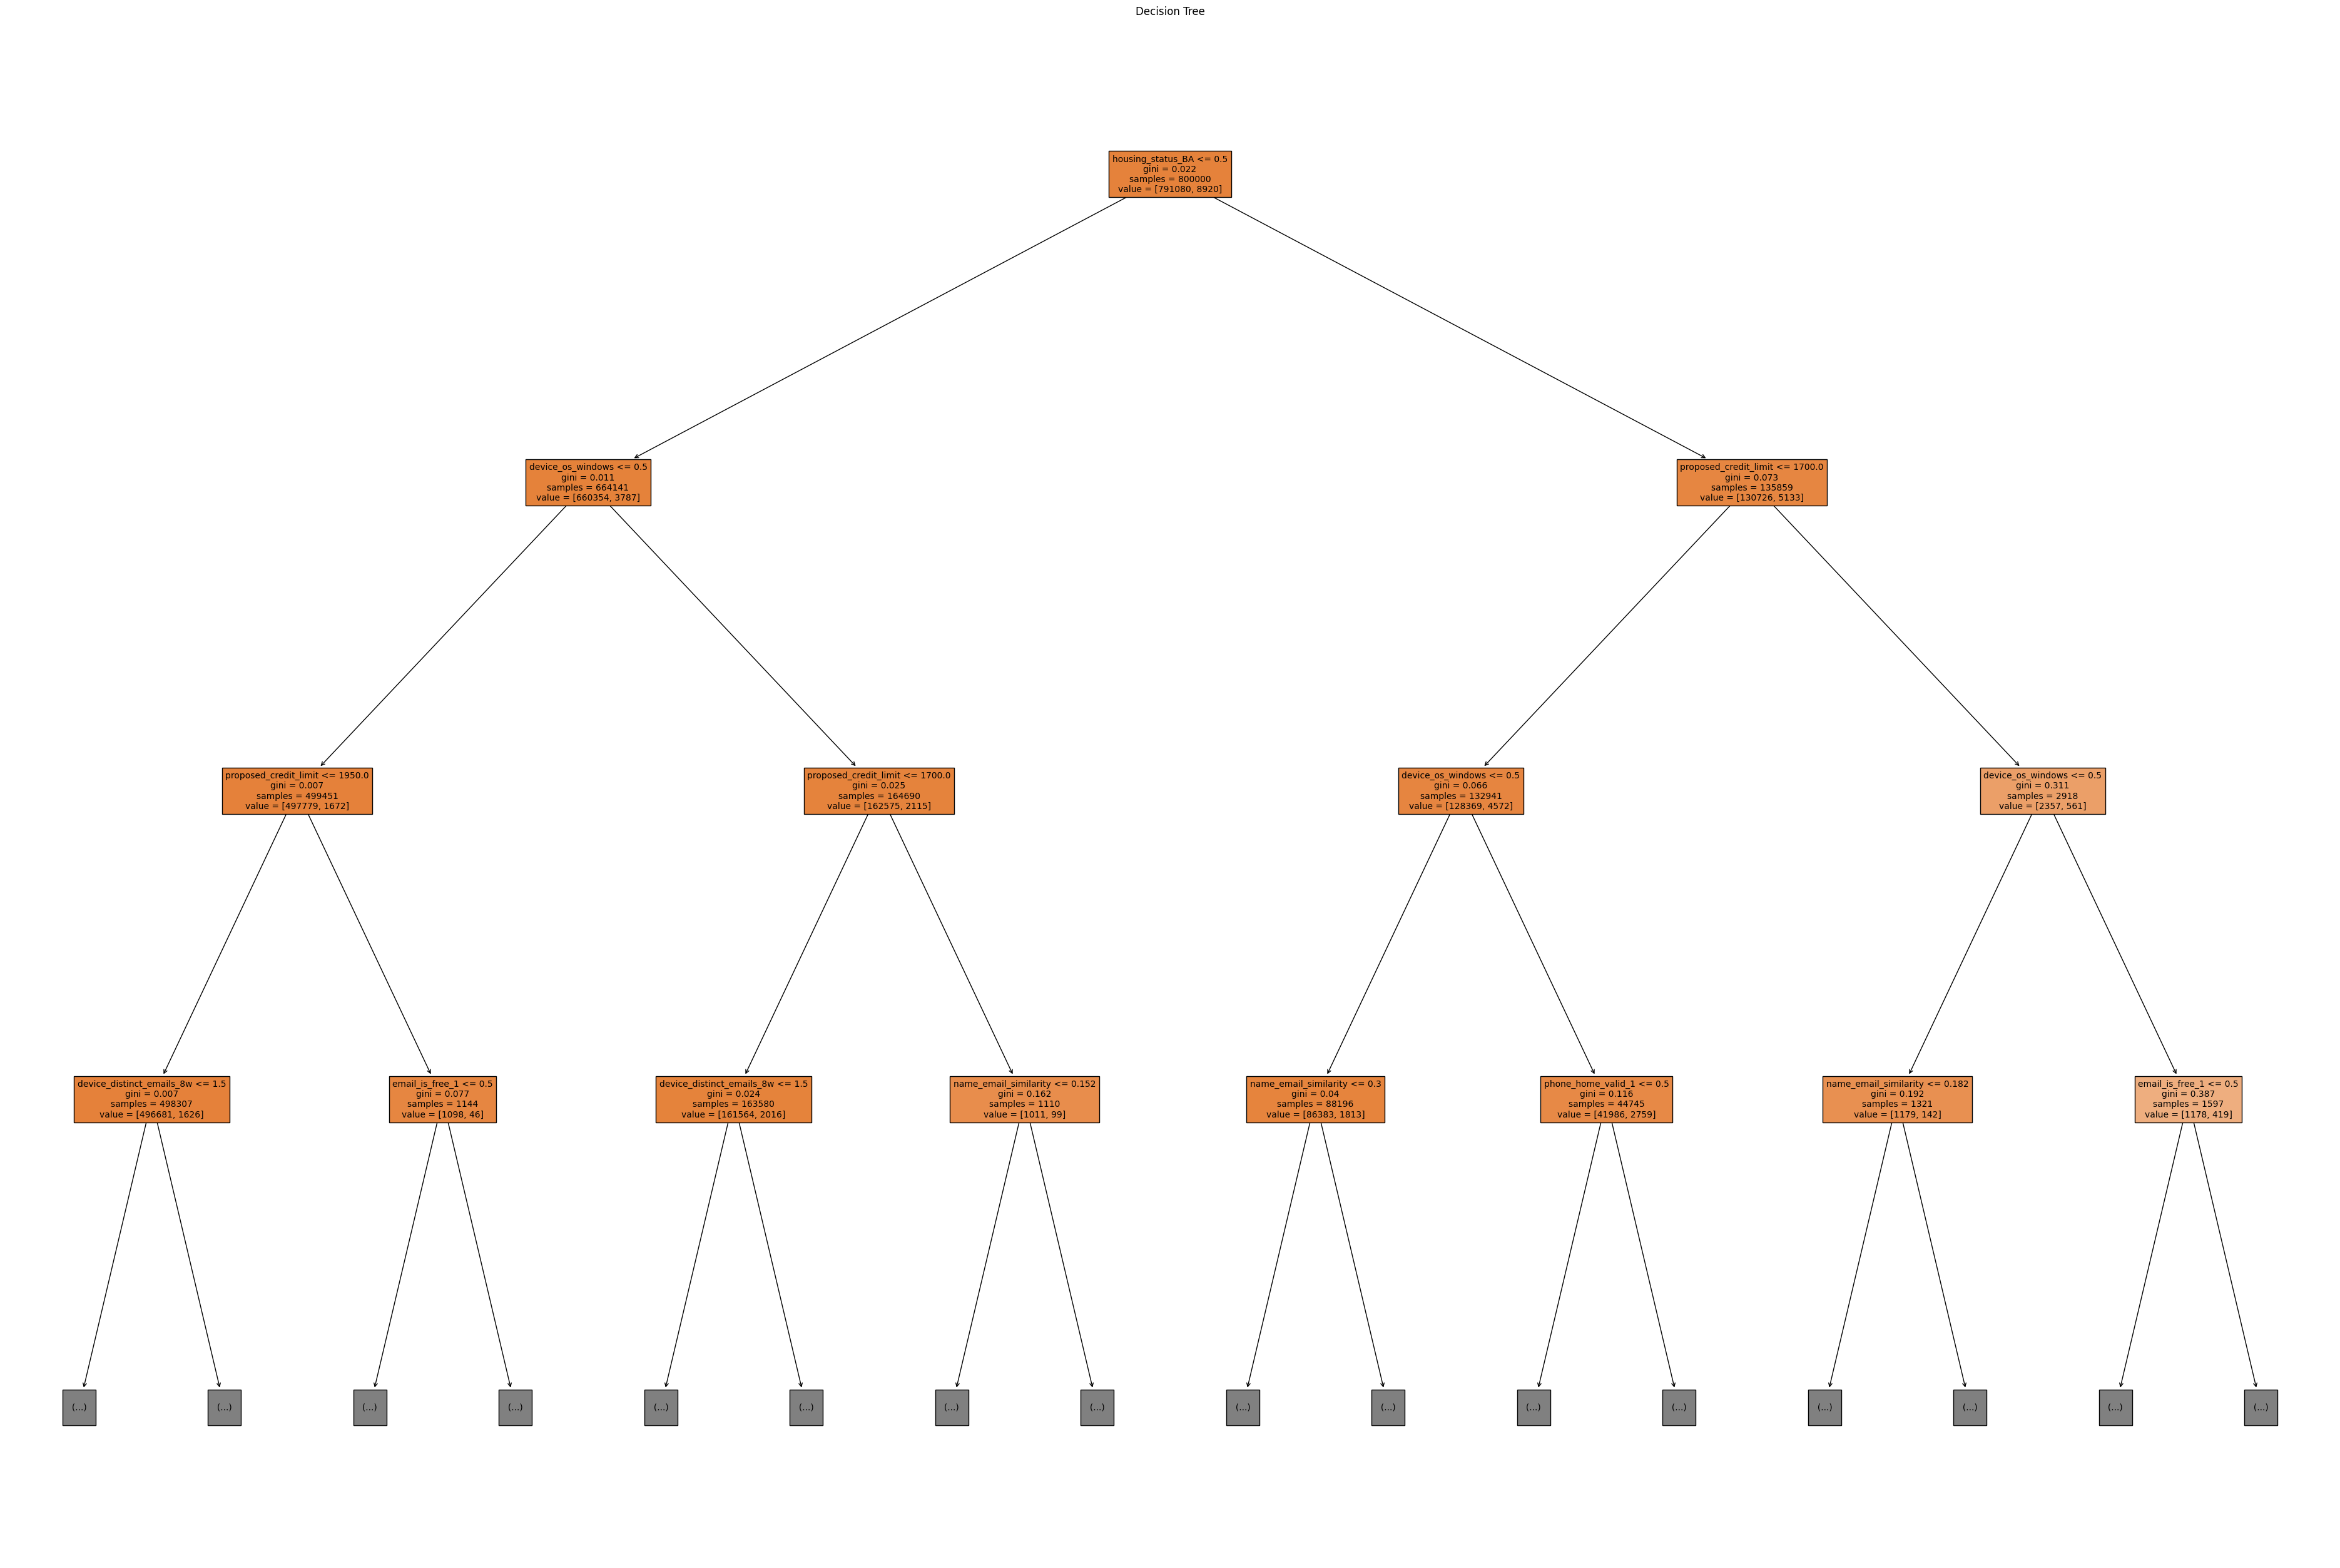

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Assume df is your DataFrame

# Split the data into features (X) and target labels (y)
X = df.drop('fraud_bool', axis=1)  # Include all columns except the target
y = df['fraud_bool']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)
column_names = X.columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance of the model
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(48, 32))
plot_tree(dt_classifier, max_depth=3, filled=True, fontsize=10,feature_names=column_names)
plt.title("Decision Tree")
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Assume df is your DataFrame

# Separate fraud and non-fraud data
fraud_data = df[df['fraud_bool'] == 1]
non_fraud_data = df[df['fraud_bool'] == 0]

# Sample non-fraud data to match the size of fraud data
undersampled_non_fraud_data = non_fraud_data.sample(n=len(fraud_data), random_state=42)

# Combine fraud and undersampled non-fraud data
combined_data = pd.concat([fraud_data, undersampled_non_fraud_data])

# Split the combined data into features (X) and target labels (y)
X = combined_data.drop('fraud_bool', axis=1)  # Include all columns except the target
y = combined_data['fraud_bool']

# Get column names after one-hot encoding
X = pd.get_dummies(X)
column_names = X.columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance of the model
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(120, 80))
plot_tree(dt_classifier, max_depth=4, filled=True, fontsize=10, feature_names=column_names)
plt.title("Decision Tree")
plt.show()

Decision Tree Classifier:
Accuracy: 0.706935630099728
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      2180
           1       0.71      0.70      0.71      2232

    accuracy                           0.71      4412
   macro avg       0.71      0.71      0.71      4412
weighted avg       0.71      0.71      0.71      4412

